In [1]:
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
book = requests.get('https://gutenberg.org/files/35/35-0.txt')

In [3]:
book

<Response [200]>

In [4]:
# the above output is response of the web Gutenberg server

In [5]:
text = book.text

print(type(text))
print(len(text))

<class 'str'>
204357


In [6]:
# show first 2000 charachter

text[:2000]


'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Time Machine\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease Date: July, 1992 [eBook #35]\r\n[Most recently updated: October 22, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV 

In [7]:
# Character strings to replace with space

strings2replace = [
    '\r\n\r\nâ\x80\x9c', #new paragraph
    'â\x80\x9c',         #open quote
    'â\x80\x9d',         #close quote
    '\r\n',              #new line
    'â\x80\x94',         #hyphen
    'â\x80\x99',         #single apostrophe
    'â\x80\x98',         #single quote
    '_',                 #underscore, used for stressing
]


In [8]:
for str2match in strings2replace:
    #create new regular expression
    regex = re.compile(r'%s'%str2match)
    text = regex.sub(' ',text) # python every time see this string here, match and replace and overwrite
    

In [9]:
text[:10000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [eBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding: UTF-8   *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks

In [10]:
# Distrubition of words lengths

words = text.split()

print(len(words))


35811


In [11]:
words[:50]

['ï»¿The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Time',
 'Machine,',
 'by',
 'H.',
 'G.',
 'Wells',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United',
 'States',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever.',
 'You',
 'may',
 'copy',
 'it,',
 'give',
 'it',
 'away',
 'or',
 're-use']

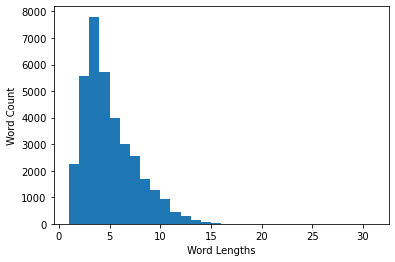

In [12]:
wordlengths = np.zeros(len(words))

for wordi in range(len(words)):
    wordlengths[wordi] = len(words[wordi])
    
plt.hist(wordlengths, bins=30)
plt.xlabel('Word Lengths')
plt.ylabel('Word Count')
plt.show()

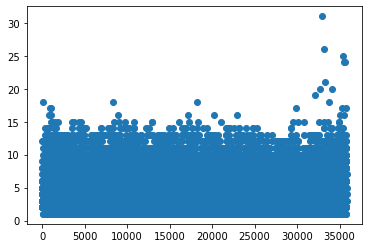

In [13]:
wordlengths = np.zeros(len(words))

for wordi in range(len(words)):
    wordlengths[wordi] = len(words[wordi])
    
plt.plot(wordlengths,'o')
plt.show()

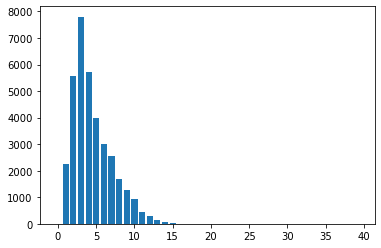

In [14]:
# Another way to show frequency of how many letters have words
# loop through all the words and count how many letters are in each word
# and then add a number to this vector here according to the number of letters in each word

wordcounts = np.zeros(40) # Assuming no words that are longer than 40 letters

for wrd in words:
    wordcounts[len(wrd)] += 1
    
plt.bar(range(len(wordcounts)), wordcounts)
plt.show()

In [15]:
# Letter Frequencies
# Compute the letter frequencies
# How often appear in the book

In [16]:
letters = string.ascii_lowercase

# Not every charachter inside the string is actually a letter that we care about

text.count('a')


12432

In [17]:
# convert the entire text in to lowercase
text.lower().count('a')

12752

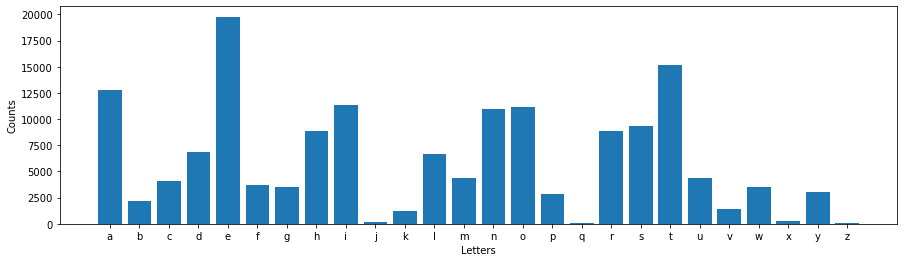

In [18]:
len_letters = len(letters)
lettercounts = np.zeros(len_letters) #Why np.zero == if I see a bunch of zeros, I know something is suspicious.
n = 0 #indexing variable


for i in letters:
    lettercounts[n] = text.lower().count(i)
    n += 1
    
fig, ax = plt.subplots(1, figsize=(15,4))
ax.bar(range(len_letters),lettercounts)
ax.set_xticks(range(len_letters))
ax.set_xticklabels(letters)
ax.set_xlabel('Letters')
ax.set_ylabel('Counts')
plt.show()

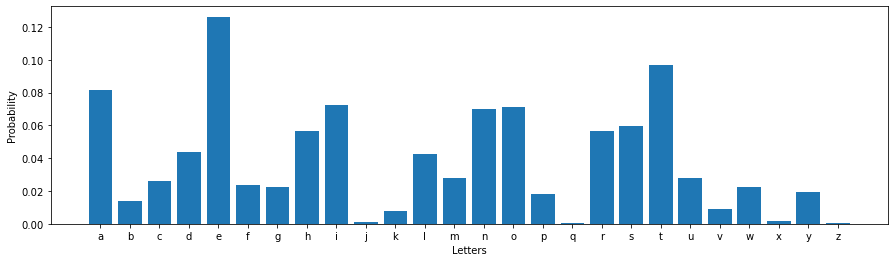

In [19]:
# Letter Entropy

letterprob = lettercounts / sum(lettercounts)

fig, ax = plt.subplots(1, figsize=(15,4))
ax.bar(range(len_letters),letterprob)
ax.set_xticks(range(len_letters))
ax.set_xticklabels(letters)
ax.set_xlabel('Letters')
ax.set_ylabel('Probability')
fig; # this figure kept in memory
plt.show()

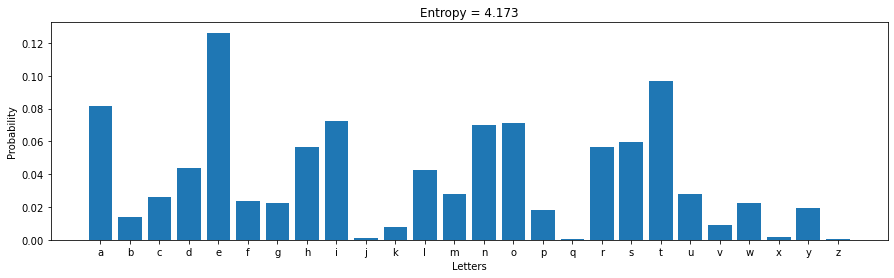

In [20]:
entropy = -sum(letterprob * np.log2(letterprob))
ax.set_title('Entropy = %.3f'%entropy)
fig # regenerate the figure

In [21]:
# Conditional (sequence) Entropy
# Let's Consider in English what is the other letters come after letter 'a'
# For example very low probablity 'a' follow 'a'

In [22]:
# The another point is that the conditional entropy is higher for some of letters then there
# are many possibilities for other letters that can follow some letters

In [23]:
probability_matrix = np.zeros((len_letters,len_letters))

for i in range(len(text)-1):
    
    currlet = text[i]
    nextlet = text[i+1]
    if currlet in letters and nextlet in letters:
        probability_matrix[letters.index(currlet),letters.index(nextlet)] += 1
        

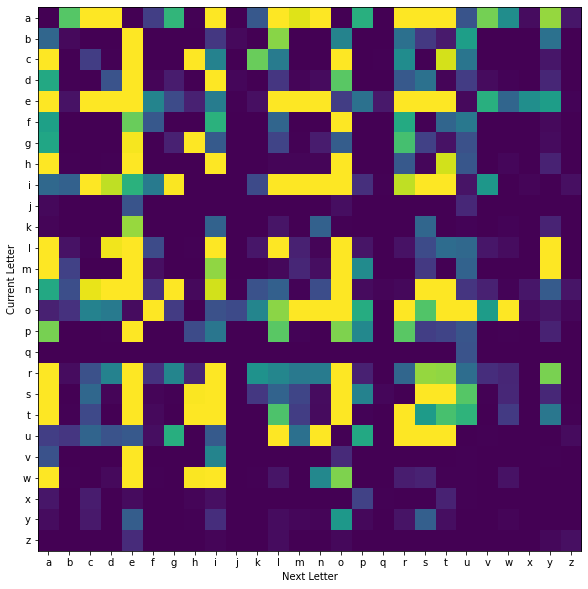

In [24]:
fig, ax = plt.subplots(1, figsize=(10,10))

ax.imshow(probability_matrix, vmax=400)
ax.set_ylabel('Current Letter')
ax.set_xlabel('Next Letter')
ax.set_xticks(range(len_letters))
ax.set_yticks(range(len_letters))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)                       
plt.show()

In [25]:
# We need to convert this into our plot of conditional entropy.
# It has to be done row wise
# We take each row or we loop through this matrix, take each row and then convert that row probabilities

In [26]:
conditional_entropy = np.zeros(len_letters)

for i in range(len_letters):
    probs = probability_matrix[i,:]
    probs = probs / sum(probs)
    conditional_entropy[i] = -sum(probs*np.log2(probs + np.finfo(float).eps))

In [27]:
conditional_entropy

array([ 3.64074099e+00,  2.95010018e+00,  3.24140006e+00,  3.00655688e+00,
        3.67748020e+00,  3.02976822e+00,  3.09026710e+00,  2.07406242e+00,
        3.36534107e+00,  1.45490467e+00,  2.33781232e+00,  3.28422605e+00,
        2.75909226e+00,  3.35378253e+00,  3.70421941e+00,  3.30734043e+00,
       -3.20342650e-16,  3.52314877e+00,  3.36621189e+00,  2.80569391e+00,
        3.46214550e+00,  1.15940487e+00,  2.72231302e+00,  2.57042486e+00,
        2.80682589e+00,  2.21839596e+00])

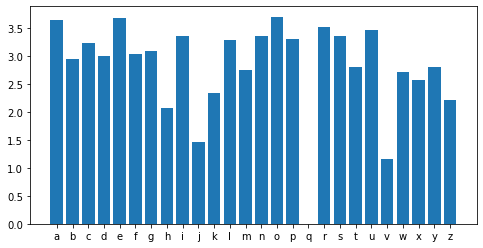

In [28]:
fig, ax = plt.subplots(1,figsize = (8,4))
ax.bar(range(len_letters), conditional_entropy)
ax.set_xticks(range(len_letters))
ax.set_xticklabels(letters)

plt.show()

In [31]:
# Make a Word Cloud
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 153.1/153.1 kB 4.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [32]:
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud().generate(text)
